In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [3]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [4]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [5]:
pol_df = pol_df[pol_df.PERCENT_CHANGE_12_MONTH != '#DIV/0!']
index = pol_df["REP_FULLNAME"].index
total_enteries = len(index)
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_12_MONTH'])
pol_df['PERCENT_CHANGE_12_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_12_MONTH'], downcast="integer")


In [6]:
return_avg = pol_df['PERCENT_CHANGE_12_MONTH'].mean()
return_avg

48.97992115186869

In [7]:
total_trade = pol_df['TRANSACTION_PRICE'].sum()
total_trade

194180183

In [8]:
nominal_returns = (return_avg + 1) * (total_trade)
nominal_returns

9705110235.595432

In [9]:
total_enteries

6174

In [10]:
average_nom_returns = nominal_returns/total_enteries
average_nom_returns
pol_salary = 174000


In [11]:
pol_salary_data = {'SALARY':[174000]}
pol_trade_data = {'NOMINAL_TRADING_AVG':[average_nom_returns]}

In [12]:
total = average_nom_returns
pol_df_salary = pd.DataFrame(data=pol_salary_data)
pol_df_trade = pd.DataFrame(data=pol_trade_data)

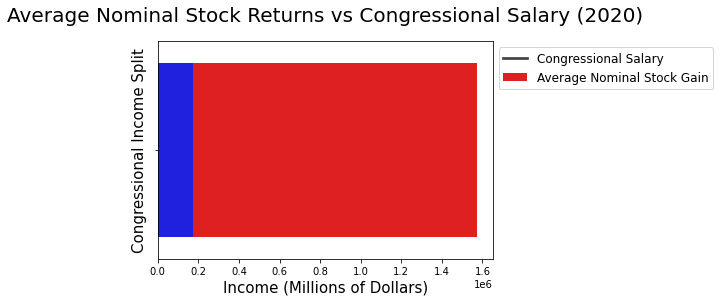

In [13]:
#single bar chart
ax1 = sns.barplot(x="NOMINAL_TRADING_AVG", data=pol_df_trade, estimator=sum, ci=None,color='red',label="Average Nominal Returns")
ax2 = sns.barplot(x="SALARY",color='blue', data=pol_df_salary,label="Congresional Salary")
ax1.set_ylabel("Congressional Income Split",fontsize=15)
ax1.set_xlabel("Income (Millions of Dollars)", fontsize=15)
ax1.set_title("Average Nominal Stock Returns vs Congressional Salary (2020)",fontsize=20,pad=20)
plt.legend(labels=["Congressional Salary","Average Nominal Stock Gain"], 
           fontsize = 'large', title_fontsize = "10",bbox_to_anchor=(1,1))